C:\Users\MANOJ KUMAR T\AppData\Local\Temp\ipykernel_17832\192391651.py:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv(


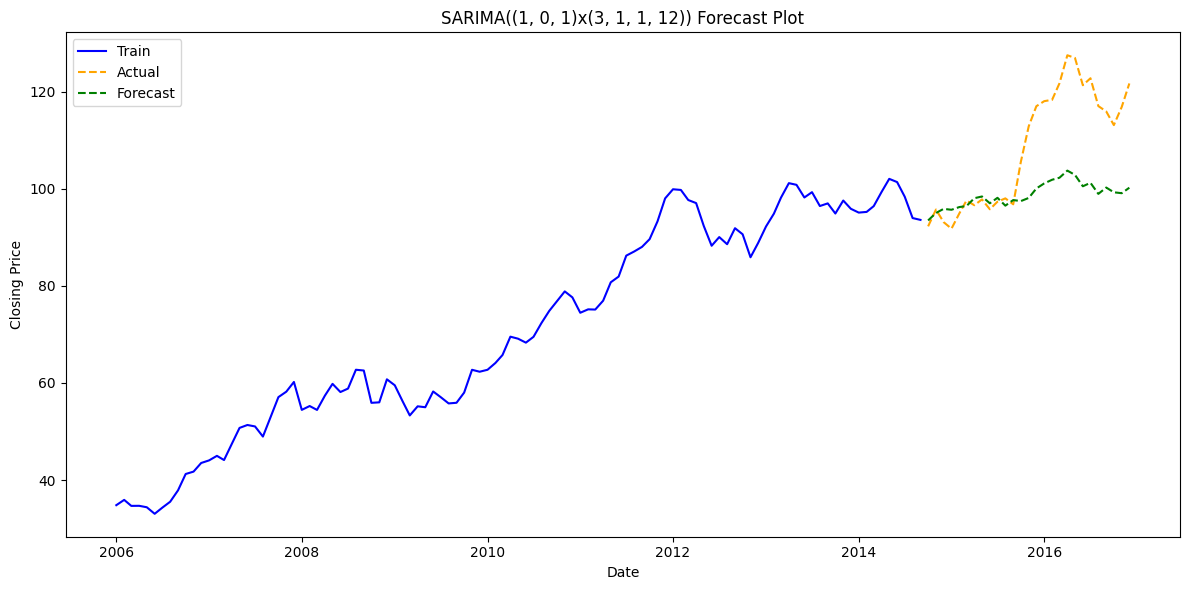

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = pd.read_csv(
    "ML471_S4_Datafile_Practice.csv",
    parse_dates=["Date"],
    index_col="Date"
)

monthly = data["Close"].resample("MS").last().dropna()

split = int(len(monthly) * 0.8)
train = monthly.iloc[:split]
test = monthly.iloc[split:]

model = SARIMAX(
    train,
    order=(1, 0, 1),
    seasonal_order=(3, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

fit = model.fit(disp=False)

forecast = fit.get_forecast(steps=len(test)).predicted_mean
forecast.index = test.index

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train", color="blue")
plt.plot(test.index, test, label="Actual", color="orange", linestyle="--")
plt.plot(forecast.index, forecast, label="Forecast", color="green", linestyle="--")
plt.title("SARIMA((1, 0, 1)x(3, 1, 1, 12)) Forecast Plot")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.tight_layout()
plt.show()
